In [1]:
from matplotlib import pyplot as plt 
import numpy as np  
%matplotlib inline
from tqdm import tqdm
from scipy.special import erf

In [2]:
import sys
sys.path.append('../lib')
from simlib import *

In [3]:
def gen_int(x, m, s):
    return erf((x-m)/(np.sqrt(2)*s))/2

def integral(x1, x2, m, s):
    if len(m) != len(s):
        raise ValueError('m and s must be of same size!')
    N = len(m)
    value = 1/N * np.sum([(gen_int(x2, m[i], s[i]) - gen_int(x1, m[i], s[i])) for i in range(N)])
    return value

In [4]:
method = 'lang'

In [15]:
m = [-6, 0, 10]
s = [2, 2, 2]
gs = [gaussian(mi, si) for mi, si in zip(m, s)]
U = gaussian_potential(gs)

In [32]:
num_particles = 100
max_t = 1000
dt = 0.01
x0 = 0.0
beta = 0.5
steps = max_t/dt

In [33]:
ts, xs = simulate(method=method, potential=U, num_particles=num_particles, max_t=max_t, dt=dt, x0=x0, beta=beta)

100%|██████████| 99999/99999 [06:54<00:00, 241.52it/s]


In [34]:
num_bins = 300
bins = np.linspace(-15, 20, num_bins)

In [35]:
hist = np.zeros(shape=(num_particles, num_bins-1))
for i in range(num_particles):
    hist[i], _ = np.histogram(xs[:,i], bins)

In [36]:
mean_hist = np.mean(hist, axis=0)

In [37]:
expected = steps * np.array([integral(bins[i], bins[i+1], m, s) for i in range(num_bins-1)])

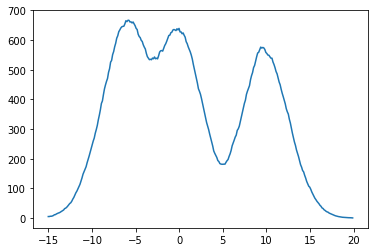

In [46]:
#plt.plot(bins[:-1], expected)
plt.plot(bins[:-1], mean_hist)